In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot


In [9]:
data = pd.read_csv('processes2.csv')
data.shape
data.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [10]:
data.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

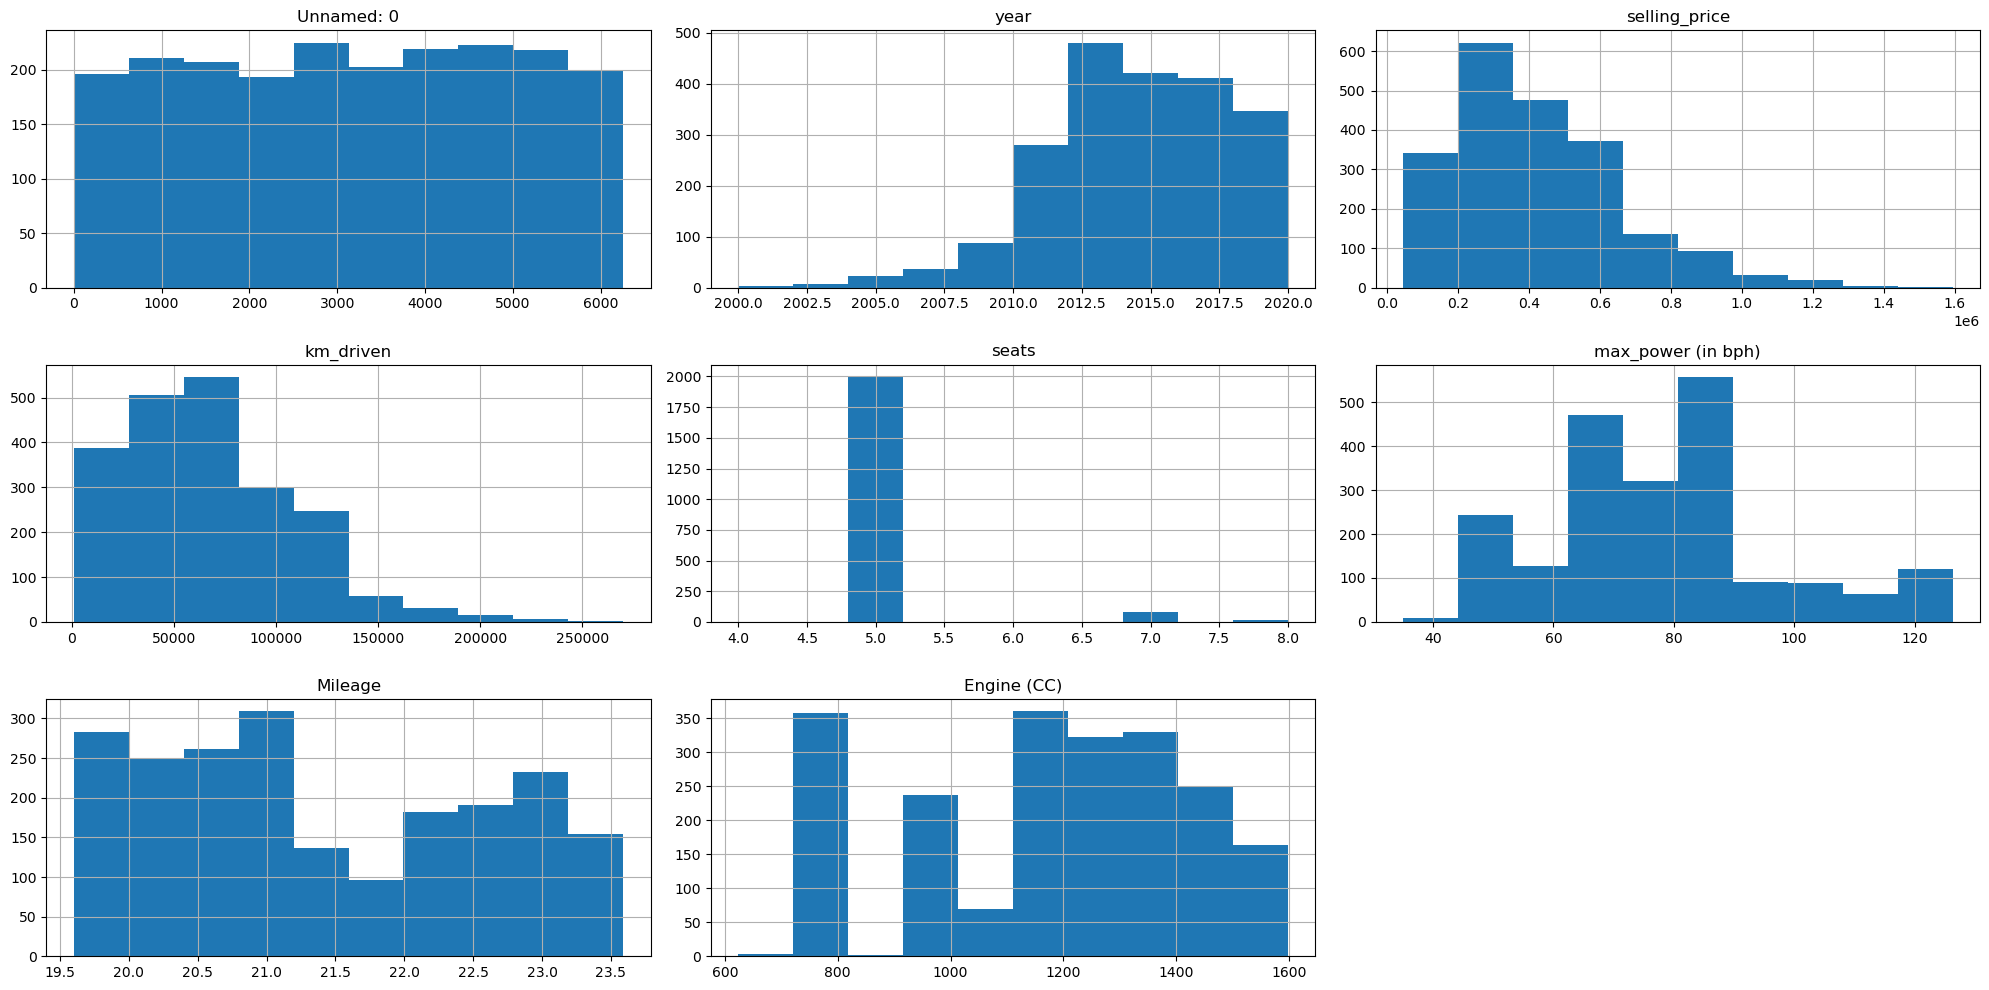

In [11]:
data.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

In [12]:
agrupado = data.groupby(['name']).size()
agrupado

name
Chevrolet      11
Ford          153
Honda           7
Hyundai       571
Mahindra       30
Maruti        921
Renault       110
Tata          130
Toyota         51
Volkswagen    111
dtype: int64

<Axes: xlabel='name'>

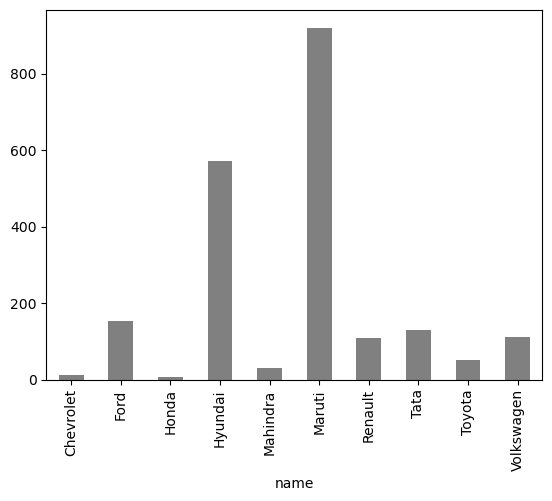

In [13]:
agrupado.plot.bar(color = 'gray')

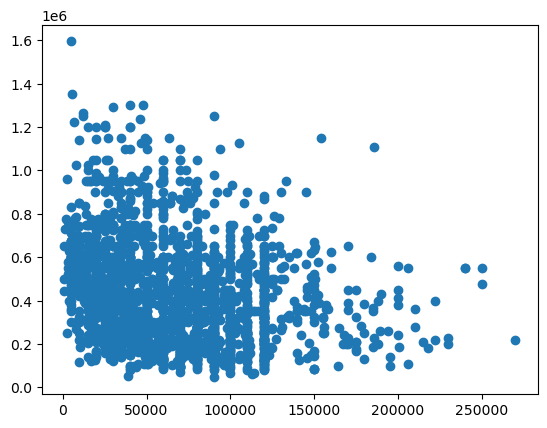

In [14]:
plt.scatter(x = 'km_driven', y = 'selling_price', data = data)

<Axes: xlabel='seats', ylabel='selling_price'>

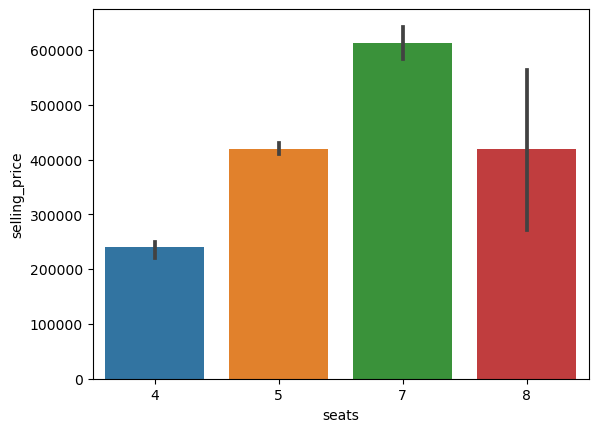

In [15]:
sb.barplot(x='seats', y = 'selling_price', data = data)
# observa-se uma maior valorização dos modelos de 7 lugares, e de 8 tbm com uma variação de preço para cima

<Axes: xlabel='max_power (in bph)', ylabel='selling_price'>

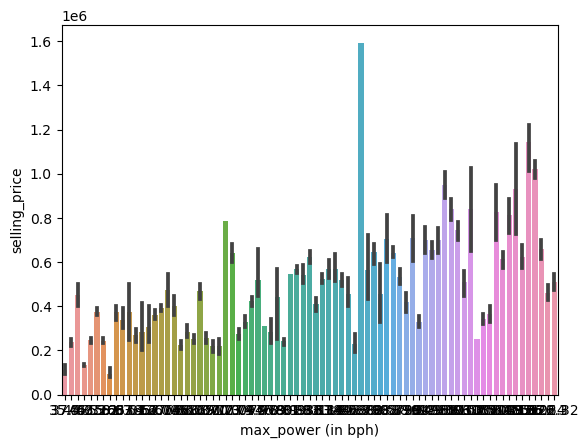

In [16]:
sb.barplot(x='max_power (in bph)', y = 'selling_price', data = data) #linear preogression with some variance

In [17]:
agrup = data.groupby(['fuel']).size()
agrup

fuel
CNG         19
Diesel    1075
LPG          1
Petrol    1000
dtype: int64

In [18]:
diesel = data.loc[data['fuel']== 'Diesel']
diesel

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,6239,Hyundai,2011,450000,128000,Diesel,Individual,Manual,Second Owner,5,126.32,kmpl,22.32,1582
2088,6242,Hyundai,2012,450000,128000,Diesel,Individual,Manual,Second Owner,5,126.32,kmpl,22.32,1582
2089,6243,Renault,2013,325000,100000,Diesel,Individual,Manual,Third Owner,5,83.80,kmpl,20.45,1461
2091,6246,Toyota,2014,425000,50000,Diesel,Individual,Manual,First Owner,5,67.06,kmpl,23.59,1364


In [19]:
petro = data.loc[data['fuel']== 'Petrol']
petro

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796
10,22,Tata,2018,500000,35000,Petrol,Individual,Manual,First Owner,5,83.81,kmpl,20.30,1199
11,23,Maruti,2016,575000,45000,Petrol,Individual,Manual,First Owner,5,83.10,kmpl,21.40,1197
12,46,Maruti,2018,850000,64000,Petrol,Dealer,Manual,First Owner,5,103.25,kmpl,20.65,1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,6226,Maruti,2018,470000,30000,Petrol,Individual,Automatic,First Owner,5,67.04,kmpl,23.10,998
2081,6228,Maruti,2018,390000,25000,Petrol,Individual,Manual,Second Owner,5,67.04,kmpl,20.51,998
2090,6245,Maruti,2017,425000,12000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,23.10,998
2092,6249,Maruti,2011,200000,73000,Petrol,Individual,Manual,First Owner,5,46.30,kmpl,19.70,796


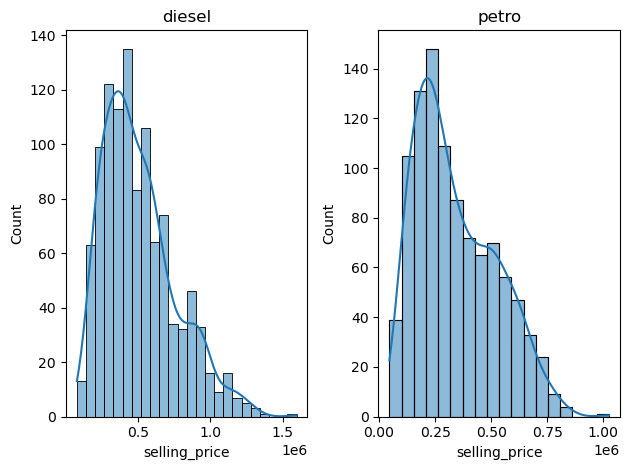

In [20]:
plt.figure()
plt.subplot(1,2,1)
sb.histplot(data.loc[data['fuel']== 'Diesel'].selling_price, kde=True).set(title='diesel')
plt.subplot(1,2,2)
sb.histplot(data.loc[data['fuel']== 'Petrol'].selling_price, kde=True).set(title='petro')
plt.tight_layout()
#petro has a lower selling price in median close to .25, while diesel is close to .5 up

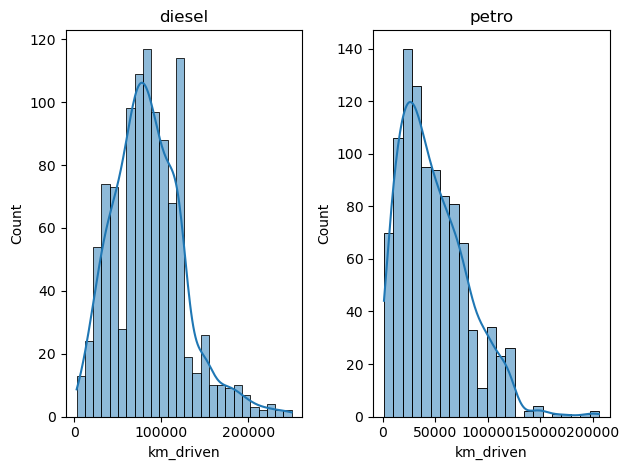

In [21]:
plt.figure()
plt.subplot(1,2,1)
sb.histplot(data.loc[data['fuel']== 'Diesel'].km_driven, kde=True).set(title='diesel')
plt.subplot(1,2,2)
sb.histplot(data.loc[data['fuel']== 'Petrol'].km_driven, kde=True).set(title='petro')
plt.tight_layout()
#petro has a much lower median Km_driven

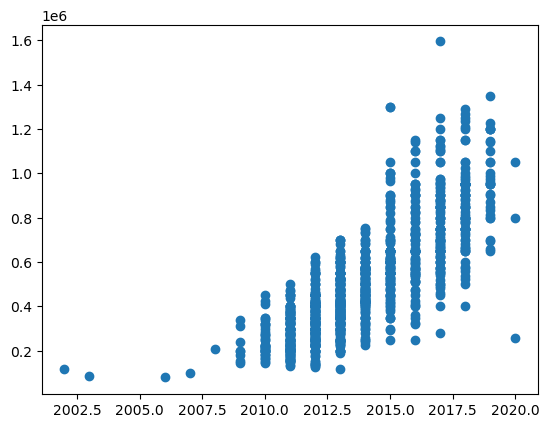

In [28]:
plt.scatter(x = 'year', y = 'selling_price', data = diesel)
plt.scatter(x = 'year', y = 'selling_price', data = petro)

<Axes: xlabel='year', ylabel='selling_price'>

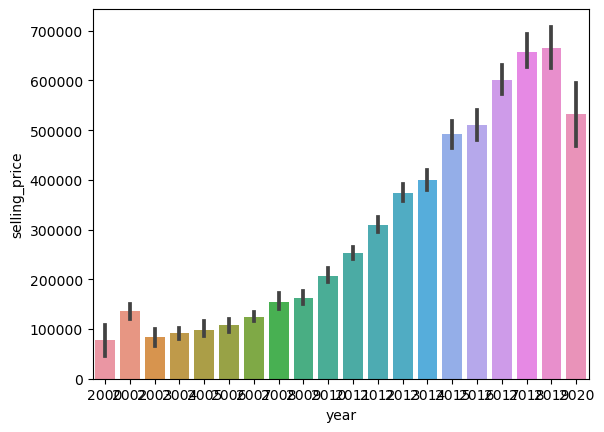

In [23]:
sb.barplot(y='selling_price', x = 'year',data=data)
# var with linear progression

<Axes: xlabel='max_power (in bph)', ylabel='selling_price'>

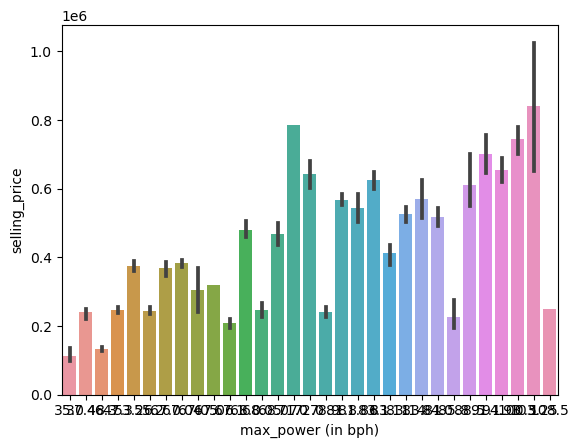

In [25]:
sb.barplot(y='selling_price', x = 'max_power (in bph)',data=petro)
# max power and selling price has a linear progression 

In [63]:
agrupado = data.groupby(['owner']).size()
agrupado

owner
First Owner             1325
Fourth & Above Owner      37
Second Owner             586
Test Drive Car             1
Third Owner              146
dtype: int64

<Axes: xlabel='owner', ylabel='selling_price'>

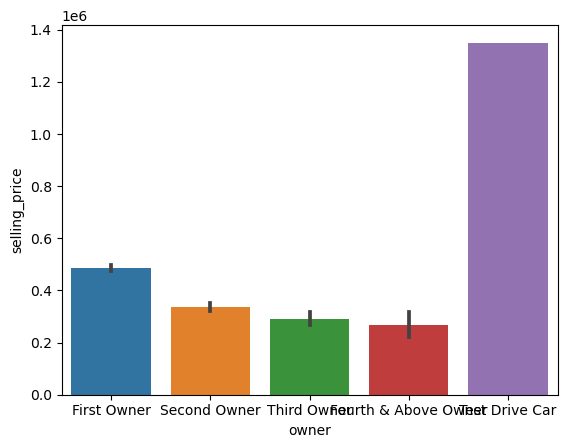

In [64]:
sb.barplot(y='selling_price', x = 'owner',data=data)

In [31]:
data.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [65]:
x1 = petro.iloc[:,10].values # max_power is significante avaliando o preço  de carros movidos a gasolina apenas
y1 = petro.iloc[:,3].values
corr = np.corrcoef(x1,y1)
corr

array([[1.        , 0.75809058],
       [0.75809058, 1.        ]])

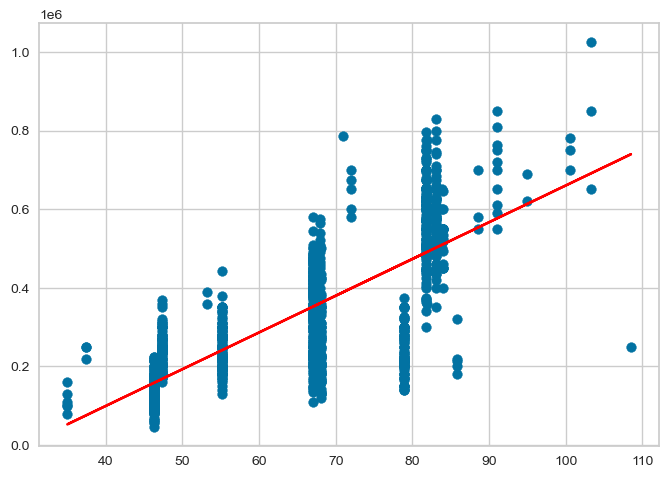

In [70]:
x1 = x1.reshape(-1,1)
#criando modelo e treino (fit indica que o modelo deve ser executado)
modelo1 = LinearRegression()
modelo1.fit(x1,y1)

modelo1.intercept_    #coeficientes
modelo1.coef_         #inclinação

#visualização
plt.scatter(x1,y1)
plt.plot(x1, modelo1.predict(x1), color = 'red')

In [67]:
x2 = petro.iloc[:,2].values
y2 = petro.iloc[:,3].values
corr = np.corrcoef(x2,y2)
corr

array([[1.        , 0.79402082],
       [0.79402082, 1.        ]])

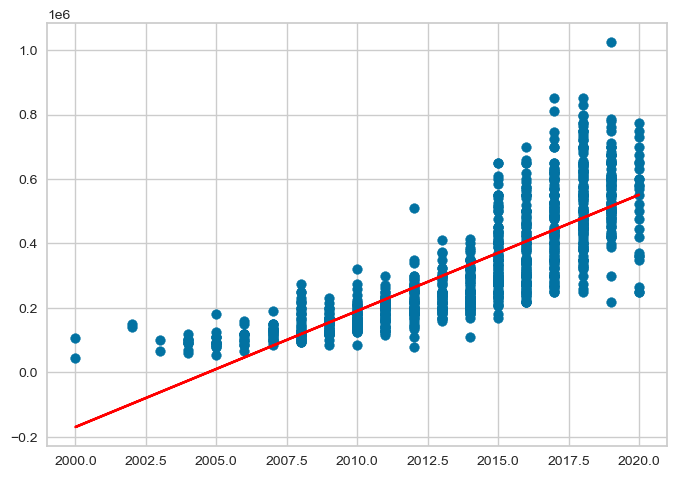

In [68]:
x2 = x2.reshape(-1,1)
#criando modelo e treino (fit indica que o modelo deve ser executado)
modelo2 = LinearRegression()
modelo2.fit(x2,y2)

modelo2.intercept_    #coeficientes
modelo2.coef_         #inclinação

#visualização
plt.scatter(x2,y2)
plt.plot(x2, modelo2.predict(x2), color = 'red')

In [71]:
x3 = diesel.iloc[:,2].values
y3 = diesel.iloc[:,3].values
corr = np.corrcoef(x3,y3)
corr

array([[1.        , 0.79657938],
       [0.79657938, 1.        ]])

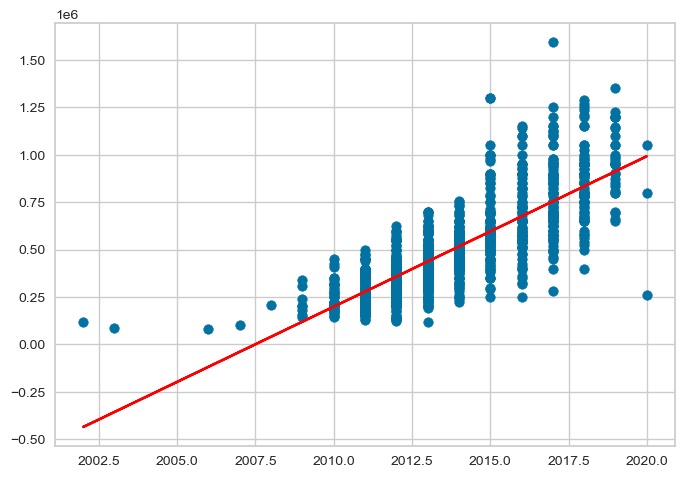

In [74]:
x3 = x3.reshape(-1,1)
#criando modelo e treino (fit indica que o modelo deve ser executado)
modelo3 = LinearRegression()
modelo3.fit(x3,y3)

modelo3.intercept_    #coeficientes
modelo3.coef_         #inclinação

#visualização
plt.scatter(x3,y3)
plt.plot(x3, modelo3.predict(x3), color = 'red')